# Implementation of a Linear Regression in neural networks

This notebook will give you a step-by-step approach to implementing a simple linear regression. At the end, regression data was generated from the sklearn package make_regression. This data was then used to train the network. This implementation can also handle multivariate linear regression problems. 

We will start by importig all required packages such as numpy, matplotlib for visualisation, as well as pandas for reading in our data (Would be handy if you have a spreadsheet in excel .csv or .txt format)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
np.random.seed(20)

Now we will generate a regression data using sklearn make_regression function

In [2]:
sample_size = 200
n_input_features = 1

In [3]:
from sklearn.datasets import make_regression

In [4]:

features, target = make_regression(n_samples=sample_size, 
                                   n_features= n_input_features, 
                                   n_informative = n_input_features, 
                                   noise=10)

lets make use of pandas to display our data in a dataframe

In [5]:
dataset = pd.DataFrame(features, columns=['feature'])
print(dataset.head())

    feature
0 -1.852038
1  2.059838
2 -2.066949
3 -0.012551
4  1.204511


In [6]:
dataset['target'] = pd.DataFrame(target, columns=['target'])
print(dataset.head())

    feature      target
0 -1.852038 -124.297879
1  2.059838  117.843942
2 -2.066949 -121.797170
3 -0.012551    1.997506
4  1.204511   82.949787


In [7]:
dataset.head()

,feature,target
0,-1.852038,-124.297879
1,2.059838,117.843942
2,-2.066949,-121.797170
3,-0.012551,1.997506
4,1.204511,82.949787


Curious what kind of data we generated? That we can easily visualise to in other to see the datapoints and how noisy it is

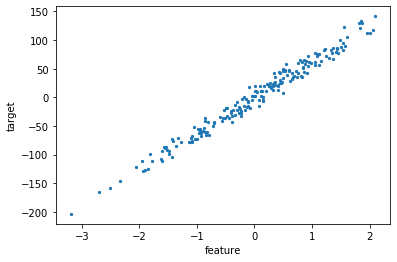

In [8]:
dataset.plot(kind = 'scatter', x = 'feature', y='target', marker='.')

In other to be able to use array ops for the computations, to solve the array dimension mismatch, Its most advisable to insert a column of ones to the feature. This wont only bring about consistency in dimensions but also will be like a dummy variable.

In [9]:
dataset.insert(0,'Ones',1)
dataset.head()

,Ones,feature,target
0,1,-1.852038,-124.297879
1,1,2.059838,117.843942
2,1,-2.066949,-121.797170
3,1,-0.012551,1.997506
4,1,1.204511,82.949787


Now we can split our data into features (training set) and target in other to feed into the model 

In [10]:
cols = dataset.shape[1]
X = dataset.iloc[:,0:cols-1]
y= dataset.iloc[:,cols-1:cols]

check the head of both X and y

In [11]:
X.head()

,Ones,feature
0,1,-1.852038
1,1,2.059838
2,1,-2.066949
3,1,-0.012551
4,1,1.204511


In [12]:

y.head()

,target
0,-124.297879
1,117.843942
2,-121.797170
3,1.997506
4,82.949787


Convert X, y and theta into matrix form and check the shape

In [13]:
X=np.matrix(X.values)
y=np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [14]:
X.shape, theta.shape,y.shape

((200, 2), (1, 2), (200, 1))

Define the function to compute the cost and compute the cost

In [15]:
def linreg_cost(X,y,theta):
    inner= np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [16]:
linreg_cost(X,y,theta)

2159.6801460213264

Define the gradient descent function to minimise the cost.

In [17]:
def grad_desc(X,y,theta,learning_rate, n_iterations):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(n_iterations)
    
    for i in range(n_iterations):
        error = (X*theta.T)-y
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - ((learning_rate/len(X))*np.sum(term))
        theta=temp
        cost[i] = linreg_cost(X,y,theta)
        
    return theta, cost

Call the gradient descent function. Check for the cost function once again to see the effect of the  minimised parameters. This is expected to return a cost lower than the previous cost computed above

In [18]:
learning_rate = 0.01
n_iterations = 220

In [19]:
gradient_descent,cost = grad_desc(X,y,theta,learning_rate, n_iterations)
gradient_descent

matrix([[ 0.45060826, 56.78310458]])

In [20]:
linreg_cost(X,y,gradient_descent)

65.86205736208875

Visualize the cost against number of iterations to see how your gradient descent is performing. This can also help you choose an appropriate number of iterations your gradient descent would converge.

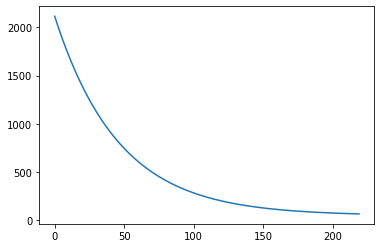

In [21]:
plt.plot(np.arange(n_iterations), cost)

Visialise to see the fit to data

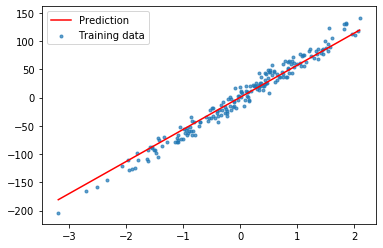

In [26]:
x= np.linspace(dataset.feature.min(), dataset.feature.max(),100)
f= gradient_descent[0,0]+(gradient_descent[0,1]*x)
fig,ax = plt.subplots()
ax.plot(x,f,'r',label='Prediction')
ax.scatter(dataset.feature,dataset.target,label= 'Training data', marker='.',alpha=0.7)
ax.legend(loc=0)

Thanks for following